<a href="https://colab.research.google.com/github/Ashok401/AIML_BootCamp/blob/main/Capstone_iPhone_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Data set : https://www.kaggle.com/datasets/mrmars1010/iphone-customer-reviews-nlp

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/iphone.csv')
#pd.set_option('display.max_colwidth', None)

#AI: Ashok :reviewTitle & reviewDescription put together.
# All of these are iPhone 13 or something diff? Hint : variantAsin, check the kaggle site.
# Cross table, Piviot table.
# Rating Vs Review description - Is there parity ? Or No rating, can we get it from decription.

# AI : Yujin :
#Review chapter 19 (ScikitLearn) & 27 (NLP) and share your suggestions or provide more useful docs.

# --> df['reviewDescription'].describe()
#How can I get more insights ? And can you review "reviewDescription" enough to use ScikitLearn & NLP ?

# --> df[df['reviewDescription'].str.contains('not happy', na = False)]['reviewDescription']
#How can I get the full text here? Ashok : I fixed it, no action needed for this case.



In [8]:
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [9]:
df.shape

(3062, 11)

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df.shape

(2960, 11)

In [12]:
df[df['ratingScore'] == 5].value_counts().sum()

np.int64(1539)

In [13]:
df = df[df['isVerified']]

In [14]:
df['variant'].describe()
#Most popular model from the set: Colour: BlueSize: 128 GB

,variant
count,2761
unique,83
top,Colour: BlueSize: 128 GB
freq,284


In [15]:
df['reviewDescription'].describe()
#AI : Yujin : How can I get more insights ?


,reviewDescription
count,2761
unique,2115
top,Good
freq,32


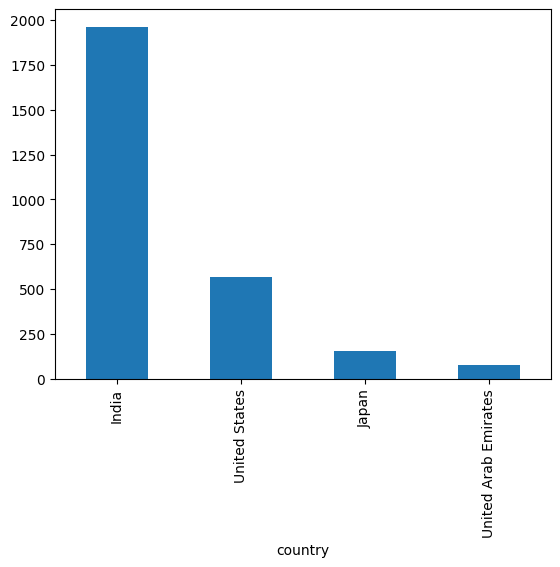

In [16]:
df['country'].value_counts().plot(kind='bar')
plt.show()

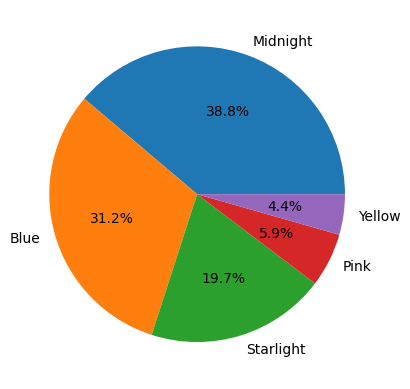

In [17]:
MidnightSize = df['variant'].str.contains('Color: MidnightSize', na = False).sum()
Blue = df['variant'].str.contains('Color: Blue', na = False).sum()
Starlight = df['variant'].str.contains('Color: Starlight', na = False).sum()
Pink = df['variant'].str.contains('Color: Pink', na = False).sum()
Yellow = df['variant'].str.contains('Color: Yellow', na = False).sum()

plt.pie([MidnightSize, Blue, Starlight, Pink, Yellow], labels=['Midnight', 'Blue', 'Starlight', 'Pink','Yellow'], autopct='%1.1f%%')
plt.show()

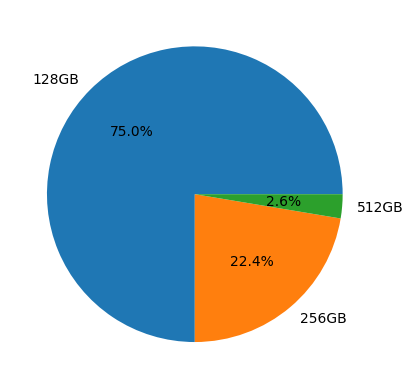

In [18]:
Size_128 = df['variant'].str.contains('Size: 128GB', na = False).sum()
Size_256 = df['variant'].str.contains('Size: 256GB', na = False).sum()
Size_512 = df['variant'].str.contains('Size: 512GB', na = False).sum()
plt.pie([Size_128, Size_256, Size_512], labels=['128GB', '256GB', '512GB'], autopct='%1.1f%%')
plt.show()


In [19]:
matched = df[df['reviewDescription'].str.contains('not happy', na = False)]['reviewDescription']
matched.str.lstrip()
#AI : Yujin : How can I get full text here? Ashok : I fixed it.


,reviewDescription
1158,I recently purchased I phone 14 and I'm not ha...
1641,"Happy with the phone, but not happy with the s..."
1681,I bought it in good condition. I paid $450 but...
3058,iam not happy with this product why because ch...


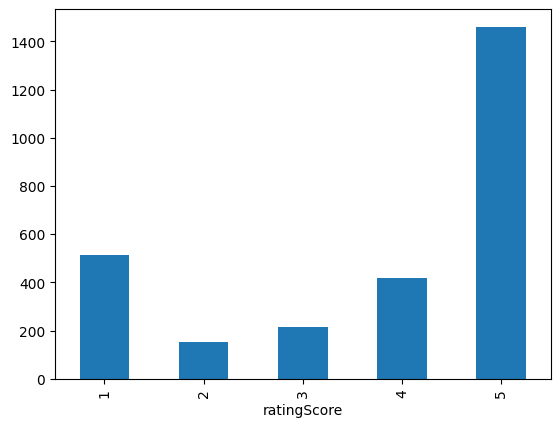

In [20]:
df['ratingScore'].value_counts().reindex([1, 2, 3, 4, 5]).plot(kind='bar')
plt.show()

plt.show() # Go with order (1, 2, ... 5) # Ashok : Fixed.

In [21]:
df[df['ratingScore'] == 5]['variant'].describe()

,variant
count,1460
unique,69
top,Colour: BlueSize: 128 GB
freq,113


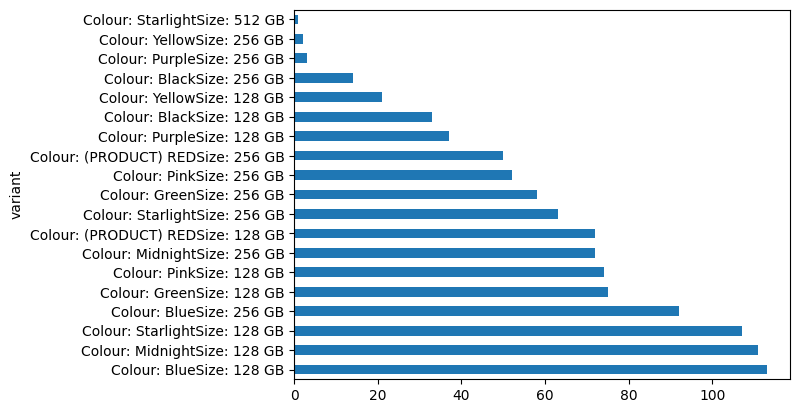

In [22]:
filtered = df[(df['ratingScore'] == 5) & (df['country']=='India')]
filtered['variant'].value_counts().plot(kind='barh')
plt.show() #Horizantal bar-chart (Fixed), do more work, use heat map (work in progress)

<function matplotlib.pyplot.show(close=None, block=None)>

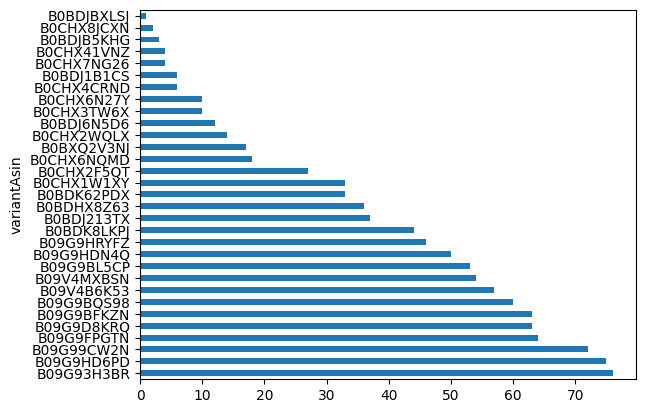

In [23]:
filtered['variantAsin'].value_counts().plot(kind='barh')
plt.show #Horizontal (fixed), check why mapping is diff wrt above(work in progress).

In [39]:
df['review'] = df['reviewTitle'] + ' ' + df['reviewDescription']
df['word_count'] = df['review'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
sorted_df = df.sort_values(by='word_count', ascending=False)
top100 = sorted_df.nlargest(100, 'word_count')
top100.to_csv('top100_wordcounts', index=False)

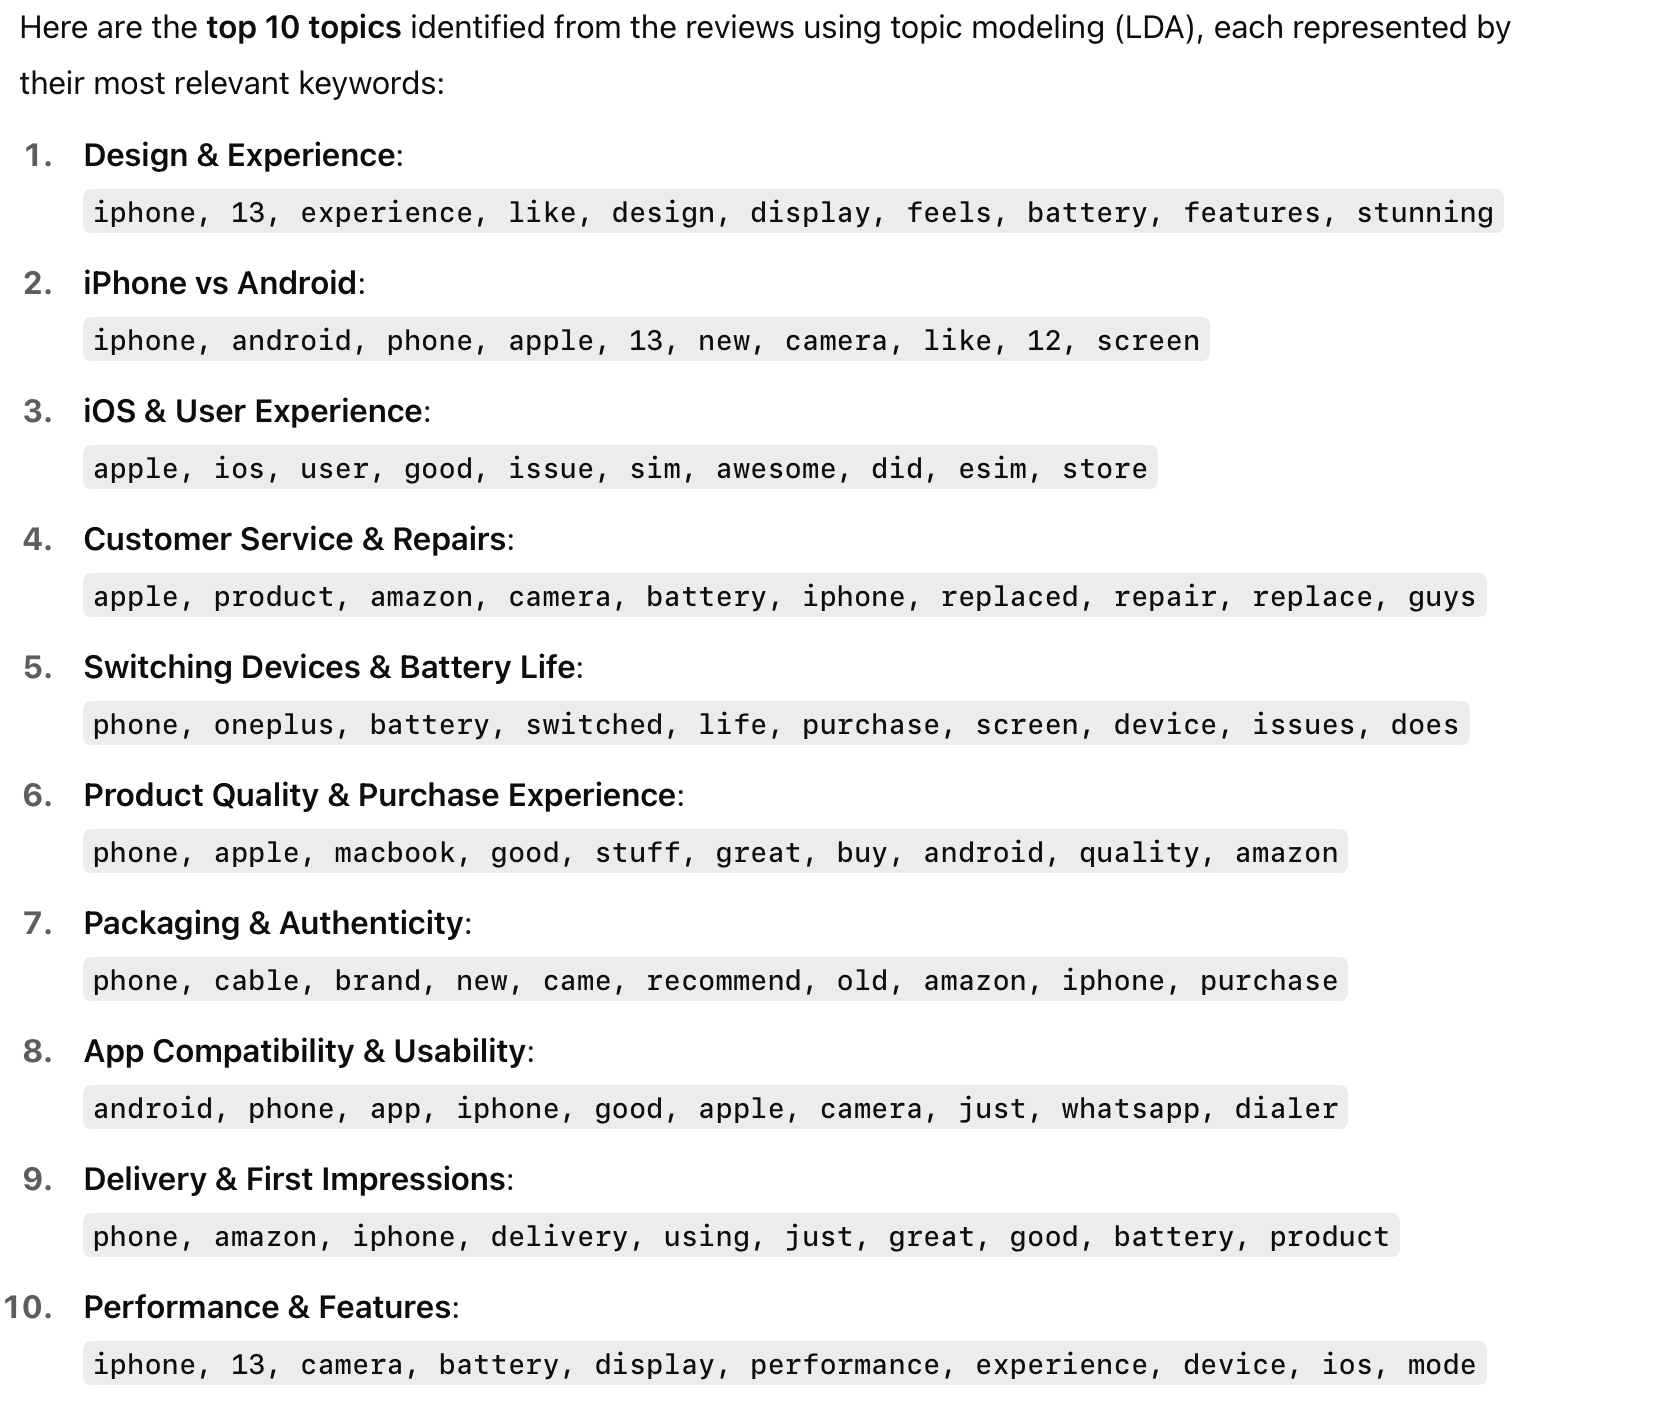